# K-nearest neighbors na Regressão
   Assim como antes nos problemas de classificação podemos utilizar a distância euclidiana para calcular a distância entre as instâncias porem a diferença reside na forma em que será calculado o valor para se associar a instância que está sendo testada.
   Invés de usarmos aquela classe que aparece com mais frequência(classe dominante) no vetor dos vizinhos mais próximos, pegaremos uma média dos valores dessas instâncias. A saída é um valor numérico. Este valor será uma medida de posição dos valores dos seus vizinhos mais próximos, por exemplo a média ou mediana.

In [8]:
import pandas as pd
dataset_train = pd.read_csv('../../data/modified/blogData_newTrain.csv') # Importing train dataframe
dataset_test = pd.read_csv('../../data/modified/blogData_newTest.csv') # Importing test dataframe

In [9]:
# select test data
x_test = dataset_test.iloc[:, 0:-1] # all coluns
y_test = dataset_test.iloc[:,-1] # last column of data frame

# selects train data
x_train = dataset_train.iloc[:,0:-1] # all coluns
y_train = dataset_train.iloc[:,-1] # last column of data frame

In [10]:
print("Train: % " + str(len(x_train)/(len(x_train) + len(x_test)))) # % de treino
print("Test: % " + str(len(x_test)/(len(x_train) + len(x_test)))) # % de teste

Train: % 0.8729777911064461
Test: % 0.12702220889355392


## Definindo o melhor K para o KNN

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import time

init = time.time() # initial time point

# Search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsRegressor with k neighbours
    knn = KNeighborsRegressor(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsRegressor with k neighbours
    scores = cross_val_score(knn, x_test, y_test, cv=10, scoring='r2')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print('Execution time: {} seconds'.format(str(time.time() - init)))
print('K Scores List' + str(k_scores))

print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Execution time: 21.886439085006714 seconds
K Scores List[0.24925061864537837, 0.31701862335700054, 0.31230378864994124, 0.3284965511640296, 0.35164645591733884, 0.36576330533026397, 0.3582031427207086, 0.34729295399268584, 0.3491836113155978, 0.361052136167628, 0.3573412078659497, 0.35807001444942405, 0.3578739680392996, 0.3572840721027443, 0.35625666755717583, 0.35594037763718267, 0.3499352577055648, 0.3436747899662639, 0.33792511762255645, 0.3345420599802914, 0.3322190522646939, 0.3302078840080781, 0.3278354450270686, 0.328621703982295, 0.3289316175011555, 0.32366490513462276, 0.3214815696236425, 0.32050779248190625, 0.31504597924659056, 0.31021456251452073]
Length of list 30
Max of list 0.36576330533026397


## Exibindo os valores de K em relação aos score's

Text(0,0.5,'Cross-validated R2')

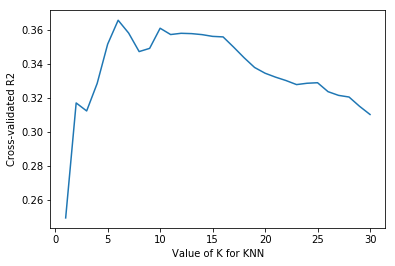

In [12]:
# plot how score changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the r2 cross-validated (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN') # Set x label
plt.ylabel('Cross-validated R2') # Set y label

### Aplicando o Knn Regressor com o "K" que contém o maior score. Aproximadamente entre 6 e 7

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import time

init = time.time()

neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
cv = cross_val_score(neigh,x_test, y_test,scoring='r2')
neigh_score = neigh.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)

print('Execution time: {} seconds'.format(str(time.time() - init)))
print('R2 score: {}'.format(neigh_score))
print(cv)
print('MAE: {}'.format(mae))

Execution time: 5.092706918716431 seconds
R2 score: 0.3396331587385292
[0.40917761 0.34091828 0.34824998]
MAE: 5.762198321091291


## K Fold

In [14]:
import numpy as np

k = 10  # 10-fold
scores = cross_val_score(neigh,x_test, y_test,cv= k)
print(scores)
hite_rate = np.mean(scores) 
print("Mean : " + str(hite_rate))

[ 0.51520431 -0.15818625  0.72109211  0.34920605  0.48707223  0.16009094
  0.36938867  0.30125615  0.40599463  0.43091259]
Mean : 0.3582031427207086


## Predições em relação ao resultado original

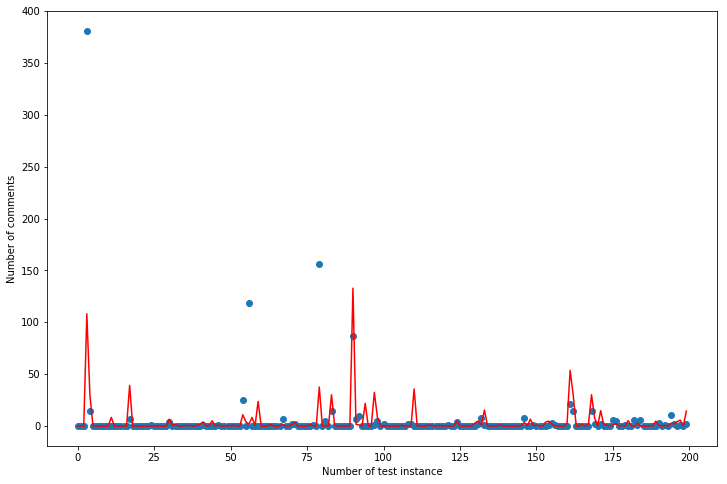

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl

x = np.arange(200)
mpl.rcParams['figure.figsize'] = (12, 8)

plt.scatter(x, y_test[:200])
plt.plot(x, y_pred[:200], color='red')
plt.xlabel('Number of test instance') # Set x label
plt.ylabel('Number of comments') # Set y label
plt.show()